# Welcome to the first PyData meetup!

  * My name is Andrey Vykhodtsev

  * I plan to do 1 meetup per 2 months

  * Meetups can be more frequent and interesting if you also engage

  * Meetup group fee is paid by NumFocus (NCO)

  * Attendees get stickers (until out of stickers)

  * first meetup is pretty basic (sorry hardcore ppl.)

# Agenda

   * Short intro Pandas / Numpy 
   * SQL vs Pandas  
   * Going through Pandas features in an interactive demo mode 
   * data loading
   * Indexing, manipulating columns and rows
   * Grouping, stacking, reshaping, pivoting  
   * Plotting directly from pandas 
   * Time series, categoricals 
   * Gotchas 



# Why are we talking about this

  * Pandas and Numpy are at the core of python datascience toolchain
  * PyData is another name
  * Numerous Python data science libraries work with or on top of Pandas / Numpy
      * scikit-learn
      * scikit-image
      * matplotlib
      * networkx
      * bokeh
      * Jupyter (these notebooks are made with Jupyter)
      

![](http://pydata.org/images/logo.png)

# Intro to Numpy 

  * Numpy is around for long time
  * Part of SciPy
  * Library to work with multidimensional arrays
  * Very fast
  * Vectorization 
  * Integration with BLAS/Lapack and Intel MKL

![](https://docs.scipy.org/doc/numpy-1.10.1/_static/img/scipy_org_logo.gif)

### Installation
  * use Anaconda !
  * How to check whether numpy is compiled with BLAS/LAPACK

In [4]:
import numpy as np

np.__config__.show()

lapack_opt_info:
    libraries = ['mkl_lapack95_lp64', 'mkl_core_dll', 'mkl_intel_lp64_dll', 'mkl_intel_thread_dll']
    library_dirs = ['C:\\Minonda\\envs\\_build\\Library\\lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['C:\\Minonda\\envs\\_build\\Library\\include']
blas_opt_info:
    libraries = ['mkl_core_dll', 'mkl_intel_lp64_dll', 'mkl_intel_thread_dll']
    library_dirs = ['C:\\Minonda\\envs\\_build\\Library\\lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['C:\\Minonda\\envs\\_build\\Library\\include']
openblas_lapack_info:
  NOT AVAILABLE
lapack_mkl_info:
    libraries = ['mkl_lapack95_lp64', 'mkl_core_dll', 'mkl_intel_lp64_dll', 'mkl_intel_thread_dll']
    library_dirs = ['C:\\Minonda\\envs\\_build\\Library\\lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['C:\\Minonda\\envs\\_build\\Library\\include']
blas_mkl_info:
    libraries = ['mkl_core_dll'

# Pandas
  * Wrapper on top of Numpy
  * inspired by R data.frame and data.table
  * A lot of flexibility
  * sometimes lost performance
  
  * Drawbacks:
      * Single-threaded
      * Memory bound

![](http://pandas.pydata.org/_static/pandas_logo.png)

# Pandas vs. SQL

  * SQL syntax can be easier to read
  * SQL has mature optimizers
  * SQL works on top of databases
  * Windowed aggregates are easier to express in SQL
  * Pandas is more flexible
  * Pandas is geared towards datascience
  * Some things are much easier to express in Pandas than  in SQL
      * how about "give me all columns that start with 'mn_' and aggregate them using mean"?

# Importing pandas and numpy

In [39]:
import pandas as pd
import numpy as np

# Loading data - Available methods

  * [IO documentation](http://pandas.pydata.org/pandas-docs/version/0.19.2/io.html)
  * from CSV
  * from TXT
  * from SQL database
  * from Excel
  * from url, zipped
  * clipboard
  * json, xml, html
  * python pickle files
  * h5

# Reading student alcohol consumption dataset

[source of the dataset](https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION)

#### reading and extracting files

In [40]:
import urllib
urllib.urlretrieve ("https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip", "student.zip")

import zipfile
zip_ref = zipfile.ZipFile("student.zip", 'r')
zip_ref.extractall(".")
zip_ref.close()

# reading and writing files

 * head command displays first 5 or N rows
 * delimiter parameter 
 * usecols parameter
 * setting pandas display options
 * setting types while reading
 * nrow

In [49]:
mat = pd.read_csv("student-mat.csv", delimiter=";")
por = pd.read_csv("student-por.csv", delimiter=";")
pd.options.display.max_columns = 500

mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [51]:
pd.read_csv("student-mat.csv", delimiter=";", usecols=["school","sex", "age"], dtype={"age":"float"}, nrows=10)

,school,sex,age
0,GP,F,18.0
1,GP,F,17.0
2,GP,F,15.0
3,GP,F,15.0
4,GP,F,16.0
5,GP,M,16.0
6,GP,M,16.0
7,GP,F,17.0
8,GP,M,15.0
9,GP,M,15.0


In [52]:
mat.to_excel("student_mat.xls")

In [54]:
mat.to_hdf("student_mat.hdf", "student" )

In [ ]:
mat2 = pd.from

# Exploring

In [26]:
mat.shape

(395, 33)

In [29]:
por.shape

(649, 33)

In [30]:
mat.age.describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [31]:
mat.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [32]:
mat['age'].mean()

16.696202531645568

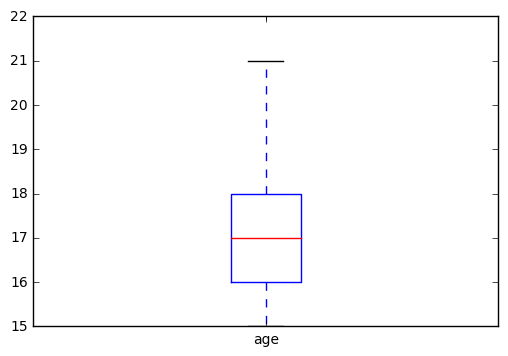

In [34]:
%matplotlib inline 

mat.age.plot(kind="box")

# Main data structures

  * [Doc bookmark about data structures](http://pandas.pydata.org/pandas-docs/stable/dsintro.html)
  * pd.Series - like column, indexed by some values
      * for ints and floats it is actually numpy ndarray
  * pd.DataFrame - bunch of pd.Series, sharing same index 
  * pd.Index, pd.MultiIndex
  * pd.GroupedData
  * pd.Panel

# Constructing series 

In [36]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}

pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [47]:
pd.Series(np.arange(1,100), name='some_col', dtype = "float").head()

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
Name: some_col, dtype: float64

# constructing DataFrames

In [61]:
pd.DataFrame({"a":pd.Series(np.arange(1,100)), "b":pd.Series(np.arange(1,10))}).head()

,a,b
0,1,1.0
1,2,2.0
2,3,3.0
3,4,4.0
4,5,5.0


In [60]:
pd.DataFrame(np.zeros((2,), dtype=[('A', 'i4'),('B', 'f4'),('C', 'a10')]))

,A,B,C
0,0,0.0,
1,0,0.0,


# Performing vectorized operations on pd.Series

In [37]:
mat.age*2

0      36
1      34
2      30
3      30
4      32
5      32
6      32
7      34
8      30
9      30
10     30
11     30
12     30
13     30
14     30
15     32
16     32
17     32
18     34
19     32
20     30
21     30
22     32
23     32
24     30
25     32
26     30
27     30
28     32
29     32
       ..
365    36
366    36
367    34
368    36
369    36
370    38
371    36
372    34
373    34
374    36
375    36
376    40
377    36
378    36
379    34
380    36
381    36
382    34
383    38
384    36
385    36
386    36
387    38
388    36
389    36
390    40
391    34
392    42
393    36
394    38
Name: age, dtype: int64

In [38]:
mat.age + mat.age/3

0      24.000000
1      22.666667
2      20.000000
3      20.000000
4      21.333333
5      21.333333
6      21.333333
7      22.666667
8      20.000000
9      20.000000
10     20.000000
11     20.000000
12     20.000000
13     20.000000
14     20.000000
15     21.333333
16     21.333333
17     21.333333
18     22.666667
19     21.333333
20     20.000000
21     20.000000
22     21.333333
23     21.333333
24     20.000000
25     21.333333
26     20.000000
27     20.000000
28     21.333333
29     21.333333
         ...    
365    24.000000
366    24.000000
367    22.666667
368    24.000000
369    24.000000
370    25.333333
371    24.000000
372    22.666667
373    22.666667
374    24.000000
375    24.000000
376    26.666667
377    24.000000
378    24.000000
379    22.666667
380    24.000000
381    24.000000
382    22.666667
383    25.333333
384    24.000000
385    24.000000
386    24.000000
387    25.333333
388    24.000000
389    24.000000
390    26.666667
391    22.666667
392    28.0000

In [42]:
(mat.age == 18).sum()

82

# Indexing and selecting

   * by using df.col
   * by list of names
   * by list or range of numbers
   * by boolean vector
   * advanced slicing
   * query and np.where
   * **df.loc, df.iloc, df.ix, df.at, df.iat**

In [62]:
pd.options.display.max_rows = 10

mat.age

0      18
1      17
2      15
3      15
4      16
       ..
390    20
391    17
392    21
393    18
394    19
Name: age, dtype: int64

In [63]:
mat['age']

0      18
1      17
2      15
3      15
4      16
       ..
390    20
391    17
392    21
393    18
394    19
Name: age, dtype: int64

In [66]:
mat.columns.str.startswith("ag")

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False], dtype=bool)

In [69]:
mat.loc[:, mat.columns.str.startswith("ag")]

,age
0,18
1,17
2,15
3,15
4,16
...,...
390,20
391,17
392,21
393,18


In [71]:
mat[20:25]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
20,GP,M,15,U,GT3,T,4,3,teacher,other,reputation,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,1,1,1,1,0,13,14,15
21,GP,M,15,U,GT3,T,4,4,health,health,other,father,1,1,0,no,yes,yes,no,yes,yes,yes,no,5,4,2,1,1,5,0,12,15,15
22,GP,M,16,U,LE3,T,4,2,teacher,other,course,mother,1,2,0,no,no,no,yes,yes,yes,yes,no,4,5,1,1,3,5,2,15,15,16
23,GP,M,16,U,LE3,T,2,2,other,other,reputation,mother,2,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,4,2,4,5,0,13,13,12
24,GP,F,15,R,GT3,T,2,4,services,health,course,mother,1,3,0,yes,yes,yes,yes,yes,yes,yes,no,4,3,2,1,1,5,2,10,9,8
25,GP,F,16,U,GT3,T,2,2,services,services,home,mother,1,1,2,no,yes,yes,no,no,yes,yes,no,1,2,2,1,3,5,14,6,9,8
26,GP,M,15,U,GT3,T,2,2,other,other,home,mother,1,1,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,2,5,2,12,12,11
27,GP,M,15,U,GT3,T,4,2,health,services,other,mother,1,1,0,no,no,yes,no,yes,yes,yes,no,2,2,4,2,4,1,4,15,16,15
28,GP,M,16,U,LE3,A,3,4,services,other,home,mother,1,2,0,yes,yes,no,yes,yes,yes,yes,no,5,3,3,1,1,5,4,11,11,11
29,GP,M,16,U,GT3,T,4,4,teacher,teacher,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,yes,4,4,5,5,5,5,16,10,12,11


In [73]:
mat[25:22:-1]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
25,GP,F,16,U,GT3,T,2,2,services,services,home,mother,1,1,2,no,yes,yes,no,no,yes,yes,no,1,2,2,1,3,5,14,6,9,8
24,GP,F,15,R,GT3,T,2,4,services,health,course,mother,1,3,0,yes,yes,yes,yes,yes,yes,yes,no,4,3,2,1,1,5,2,10,9,8
23,GP,M,16,U,LE3,T,2,2,other,other,reputation,mother,2,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,4,2,4,5,0,13,13,12


In [76]:
mat.iloc[25:22:-1, 2:4]

,age,address
25,16,U
24,15,R
23,16,U


In [83]:
mat[mat.age == 18]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
128,GP,M,18,R,GT3,T,2,2,services,other,reputation,mother,1,1,2,no,yes,no,yes,yes,yes,yes,no,3,3,3,1,2,4,0,7,4,0
150,GP,M,18,U,LE3,T,1,1,other,other,course,mother,1,1,3,no,no,no,no,yes,no,yes,yes,2,3,5,2,5,4,0,6,5,0
157,GP,F,18,R,GT3,T,1,1,at_home,other,course,mother,3,1,3,no,yes,no,yes,no,yes,no,no,5,2,5,1,5,4,6,9,8,10
213,GP,M,18,U,GT3,T,2,2,services,other,home,mother,1,2,1,no,yes,yes,yes,yes,yes,yes,no,4,4,4,2,4,5,15,6,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,MS,F,18,R,GT3,T,2,2,at_home,other,other,mother,2,3,0,no,no,yes,no,yes,yes,no,no,5,3,3,1,3,4,2,10,9,10
386,MS,F,18,R,GT3,T,4,4,teacher,at_home,reputation,mother,3,1,0,no,yes,yes,yes,yes,yes,yes,yes,4,4,3,2,2,5,7,6,5,6
388,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,3,4,1,1,1,0,7,9,8
389,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0


In [87]:
mat.iat[389, 2]

18

# More advanced selection and manipulaton

In [112]:
np.where(mat.age > 18)[0]

array([127, 153, 210, 247, 257, 270, 296, 304, 306, 307, 308, 309, 310,
       311, 312, 313, 314, 315, 336, 340, 350, 353, 370, 376, 383, 387,
       390, 392, 394], dtype=int64)

In [104]:
mat['age_low_high'] = np.where(mat.age > 18, "high", "low")

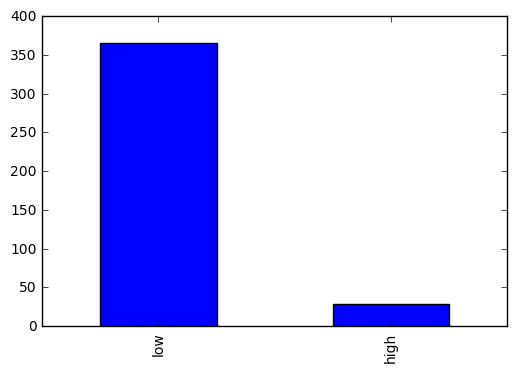

In [107]:
mat['age_low_high'].value_counts().plot(kind="bar")

In [100]:
mat.query("age == 18 and famsize == 'GT3'")

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
128,GP,M,18,R,GT3,T,2,2,services,other,reputation,mother,1,1,2,no,yes,no,yes,yes,yes,yes,no,3,3,3,1,2,4,0,7,4,0
157,GP,F,18,R,GT3,T,1,1,at_home,other,course,mother,3,1,3,no,yes,no,yes,no,yes,no,no,5,2,5,1,5,4,6,9,8,10
213,GP,M,18,U,GT3,T,2,2,services,other,home,mother,1,2,1,no,yes,yes,yes,yes,yes,yes,no,4,4,4,2,4,5,15,6,7,8
223,GP,M,18,U,GT3,T,2,2,other,other,home,mother,2,2,0,no,yes,yes,no,yes,yes,yes,no,3,3,3,5,5,4,0,12,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,MS,M,18,R,GT3,T,2,1,other,other,other,mother,2,1,0,no,no,no,yes,no,yes,yes,yes,4,4,3,1,3,5,5,7,6,7
384,MS,M,18,R,GT3,T,4,2,other,other,home,father,2,1,1,no,no,yes,no,yes,yes,no,no,5,4,3,4,3,3,14,6,5,5
385,MS,F,18,R,GT3,T,2,2,at_home,other,other,mother,2,3,0,no,no,yes,no,yes,yes,no,no,5,3,3,1,3,4,2,10,9,10
386,MS,F,18,R,GT3,T,4,4,teacher,at_home,reputation,mother,3,1,0,no,yes,yes,yes,yes,yes,yes,yes,4,4,3,2,2,5,7,6,5,6


# Grouping

  * Split-appy-combine pattern

In [113]:
mat.groupby("age")

In [117]:
mat.groupby("famsize")['age'].mean()

famsize
GT3    16.66548
LE3    16.77193
Name: age, dtype: float64

In [122]:
mat.select_dtypes(include=["int64"])

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


# take average of all the numeric columns grouped by famsize and school

In [136]:
int_cols =  mat.columns[mat.dtypes == "int64"].values
int_cols

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'G1', 'G2', 'G3'], dtype=object)

In [137]:
#mat.groupby(["famsize", "school"]).apply(lambda x: x.select_dtypes(include=["int64"])).mean()
mat.groupby(["famsize", "school"])[int_cols].mean()

age      Medu      Fedu  traveltime  studytime  \
famsize school                                                         
GT3     GP      16.511905  2.829365  2.595238    1.357143   2.103175   
        MS      18.000000  2.344828  2.275862    1.965517   1.827586   
LE3     GP      16.546392  2.731959  2.443299    1.463918   1.958763   
        MS      18.058824  2.352941  2.294118    1.823529   1.823529   

                failures    famrel  freetime     goout      Dalc      Walc  \
famsize school                                                               
GT3     GP      0.321429  3.960317  3.202381  3.091270  1.392857  2.174603   
        MS      0.517241  3.931034  3.413793  3.103448  1.689655  2.482759   
LE3     GP      0.309278  3.958763  3.278351  3.164948  1.577320  2.484536   
        MS      0.352941  3.647059  3.176471  3.058824  1.882353  2.588235   

                  health  absences         G1         G2         G3  
famsize school                                                       
GT3     GP      3.599206  5.654762  10.841270  10.658730  10.345238  
        MS      3.413793  4.413793  10.034483   9.310345   8.724138  
LE3     GP      3.515464  6.773196  11.195876  11.103093  10.865979  
        MS      3.352941  2.647059  11.764706  11.705882  11.764706

In [144]:
dt = mat.groupby(["famsize", "school"])[int_cols].agg({"cnt":np.sum, "mn":np.mean})

dt

cnt                                                          \
                 age Medu Fedu traveltime studytime failures famrel freetime   
famsize school                                                                 
GT3     GP      4161  713  654        342       530       81    998      807   
        MS       522   68   66         57        53       15    114       99   
LE3     GP      1605  265  237        142       190       30    384      318   
        MS       307   40   39         31        31        6     62       54   

                                                                         mn  \
               goout Dalc Walc health absences    G1    G2    G3        age   
famsize school                                                                
GT3     GP       779  351  548    907     1425  2732  2686  2607  16.511905   
        MS        90   49   72     99      128   291   270   253  18.000000   
LE3     GP       307  153  241    341      657  1086  1077  1054  16.546392   
        MS        52   32   44     57       45   200   199   200  18.058824   

                                                                             \
                    Medu      Fedu traveltime studytime  failures    famrel   
famsize school                                                                
GT3     GP      2.829365  2.595238   1.357143  2.103175  0.321429  3.960317   
        MS      2.344828  2.275862   1.965517  1.827586  0.517241  3.931034   
LE3     GP      2.731959  2.443299   1.463918  1.958763  0.309278  3.958763   
        MS      2.352941  2.294118   1.823529  1.823529  0.352941  3.647059   

                                                                            \
                freetime     goout      Dalc      Walc    health  absences   
famsize school                                                               
GT3     GP      3.202381  3.091270  1.392857  2.174603  3.599206  5.654762   
        MS      3.413793  3.103448  1.689655  2.482759  3.413793  4.413793   
LE3     GP      3.278351  3.164948  1.577320  2.484536  3.515464  6.773196   
        MS      3.176471  3.058824  1.882353  2.588235  3.352941  2.647059   

                                                 
                       G1         G2         G3  
famsize school                                   
GT3     GP      10.841270  10.658730  10.345238  
        MS      10.034483   9.310345   8.724138  
LE3     GP      11.195876  11.103093  10.865979  
        MS      11.764706  11.705882  11.764706

In [147]:
dt.index.get_level_values(0)

Index([u'GT3', u'GT3', u'LE3', u'LE3'], dtype='object', name=u'famsize')

# Reshaping

  * melting
  * stacking
  * unstacking
  * applying stats
  * pivoting

In [148]:
mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,age_low_high
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,low
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,low
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,low
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,low
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,low


In [149]:
pd.melt(mat, id_vars=['school', 'age'])

,school,age,variable,value
0,GP,18,sex,F
1,GP,17,sex,F
2,GP,15,sex,F
3,GP,15,sex,F
4,GP,16,sex,F
...,...,...,...,...
12635,MS,20,age_low_high,high
12636,MS,17,age_low_high,low
12637,MS,21,age_low_high,high
12638,MS,18,age_low_high,low


# Pivoting

In [154]:
mat.pivot_table(index = "age", columns = "school", values = "absences", aggfunc="mean")
#.fillna(0).astype(np.int)

school,GP,MS
age,,
15,3.341463,NaN
16,5.451923,NaN
17,6.709302,4.666667
18,7.333333,3.120000
19,12.777778,3.500000
20,0.000000,7.500000
21,NaN,3.000000
22,16.000000,NaN


In [160]:
dt = mat.stack()
dt

0    school            GP
     sex                F
     age               18
     address            U
     famsize          GT3
                     ... 
394  absences           5
     G1                 8
     G2                 9
     G3                 9
     age_low_high    high
dtype: object

In [162]:
dt.index

MultiIndex(levels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 

In [164]:
dt = mat.unstack()
dt

school        0        GP
              1        GP
              2        GP
              3        GP
              4        GP
                     ... 
age_low_high  390    high
              391     low
              392    high
              393     low
              394    high
dtype: object

In [165]:
dt.index

MultiIndex(levels=[[u'school', u'sex', u'age', u'address', u'famsize', u'Pstatus', u'Medu', u'Fedu', u'Mjob', u'Fjob', u'reason', u'guardian', u'traveltime', u'studytime', u'failures', u'schoolsup', u'famsup', u'paid', u'activities', u'nursery', u'higher', u'internet', u'romantic', u'famrel', u'freetime', u'goout', u'Dalc', u'Walc', u'health', u'absences', u'G1', u'G2', u'G3', u'age_low_high'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 1

In [166]:
dt.unstack()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394
school,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS
sex,F,F,F,F,F,M,M,F,M,M,F,F,M,M,M,F,F,F,M,M,M,M,M,M,F,F,M,M,M,M,M,M,M,M,M,F,M,M,F,F,F,M,M,M,F,F,F,M,M,F,F,F,M,F,F,F,F,M,M,F,F,F,F,F,F,F,M,F,F,F,M,M,F,M,F,M,M,F,M,F,M,M,F,M,F,F,F,F,M,M,F,F,F,F,M,F,M,F,F,F,M,M,M,F,M,F,F,M,M,F,M,F,F,M,M,M,M,M,M,M,F,M,F,M,F,M,F,F,M,M,F,F,F,F,M,F,M,F,M,F,M,M,F,F,M,F,F,F,M,M,M,M,F,M,F,M,M,F,M,M,M,M,M,M,M,M,M,F,F,F,M,M,M,F,F,M,F,M,M,M,M,M,F,F,F,M,M,M,F,M,F,F,M,M,M,F,M,M,F,F,F,F,F,F,F,F,F,F,F,F,F,M,F,M,F,F,F,M,F,F,F,F,F,M,F,F,F,M,M,F,F,M,M,M,M,M,M,F,F,M,M,M,M,M,F,M,M,M,M,M,M,M,M,M,M,M,F,M,M,F,F,M,M,F,F,M,M,F,M,F,F,F,F,M,F,F,F,M,F,M,M,M,F,F,F,M,F,F,M,M,M,F,F,F,M,M,F,F,F,M,F,M,F,F,M,F,M,M,M,F,F,F,M,F,F,F,F,F,F,F,F,F,F,F,F,M,M,M,F,F,M,F,F,F,F,F,F,F,F,F,F,M,M,F,F,F,M,M,F,M,M,M,M,M,M,F,F,F,M,F,F,M,F,F,F,M,M,F,F,F,F,M,F,F,F,F,F,F,F,F,M,M,M,M,M,F,F,F,F,F,M,M,M,M,M
age,18,17,15,15,16,16,16,17,15,15,15,15,15,15,15,16,16,16,17,16,15,15,16,16,15,16,15,15,16,16,15,15,15,15,16,15,15,16,15,15,16,15,15,15,16,15,16,16,15,15,16,15,15,15,15,16,15,15,15,16,16,16,16,16,15,16,15,16,15,15,16,15,15,16,16,15,15,16,17,16,15,15,15,15,15,15,16,15,16,16,16,15,16,16,15,15,16,16,16,16,16,16,15,15,15,15,15,16,15,16,15,16,16,15,15,16,15,16,17,15,15,15,16,16,16,15,15,19,18,16,15,15,17,16,15,15,17,16,16,15,15,16,15,16,17,15,15,15,16,15,18,16,15,19,17,15,17,18,16,16,17,15,16,17,17,16,16,16,16,16,16,16,17,16,16,17,16,17,16,17

In [169]:
mat.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394
school,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS
sex,F,F,F,F,F,M,M,F,M,M,F,F,M,M,M,F,F,F,M,M,M,M,M,M,F,F,M,M,M,M,M,M,M,M,M,F,M,M,F,F,F,M,M,M,F,F,F,M,M,F,F,F,M,F,F,F,F,M,M,F,F,F,F,F,F,F,M,F,F,F,M,M,F,M,F,M,M,F,M,F,M,M,F,M,F,F,F,F,M,M,F,F,F,F,M,F,M,F,F,F,M,M,M,F,M,F,F,M,M,F,M,F,F,M,M,M,M,M,M,M,F,M,F,M,F,M,F,F,M,M,F,F,F,F,M,F,M,F,M,F,M,M,F,F,M,F,F,F,M,M,M,M,F,M,F,M,M,F,M,M,M,M,M,M,M,M,M,F,F,F,M,M,M,F,F,M,F,M,M,M,M,M,F,F,F,M,M,M,F,M,F,F,M,M,M,F,M,M,F,F,F,F,F,F,F,F,F,F,F,F,F,M,F,M,F,F,F,M,F,F,F,F,F,M,F,F,F,M,M,F,F,M,M,M,M,M,M,F,F,M,M,M,M,M,F,M,M,M,M,M,M,M,M,M,M,M,F,M,M,F,F,M,M,F,F,M,M,F,M,F,F,F,F,M,F,F,F,M,F,M,M,M,F,F,F,M,F,F,M,M,M,F,F,F,M,M,F,F,F,M,F,M,F,F,M,F,M,M,M,F,F,F,M,F,F,F,F,F,F,F,F,F,F,F,F,M,M,M,F,F,M,F,F,F,F,F,F,F,F,F,F,M,M,F,F,F,M,M,F,M,M,M,M,M,M,F,F,F,M,F,F,M,F,F,F,M,M,F,F,F,F,M,F,F,F,F,F,F,F,F,M,M,M,M,M,F,F,F,F,F,M,M,M,M,M
age,18,17,15,15,16,16,16,17,15,15,15,15,15,15,15,16,16,16,17,16,15,15,16,16,15,16,15,15,16,16,15,15,15,15,16,15,15,16,15,15,16,15,15,15,16,15,16,16,15,15,16,15,15,15,15,16,15,15,15,16,16,16,16,16,15,16,15,16,15,15,16,15,15,16,16,15,15,16,17,16,15,15,15,15,15,15,16,15,16,16,16,15,16,16,15,15,16,16,16,16,16,16,15,15,15,15,15,16,15,16,15,16,16,15,15,16,15,16,17,15,15,15,16,16,16,15,15,19,18,16,15,15,17,16,15,15,17,16,16,15,15,16,15,16,17,15,15,15,16,15,18,16,15,19,17,15,17,18,16,16,17,15,16,17,17,16,16,16,16,16,16,16,17,16,16,17,16,17,16,17

In [181]:
mat[int_cols].stack().groupby(level = 1).mean()

age           16.696203
Medu           2.749367
Fedu           2.521519
traveltime     1.448101
studytime      2.035443
                ...    
health         3.554430
absences       5.708861
G1            10.908861
G2            10.713924
G3            10.415190
dtype: float64

# Joining and concatenating

In [182]:
stu_all = pd.concat([mat, por])

In [183]:
stu_all.head()

,Dalc,Fedu,Fjob,G1,G2,G3,Medu,Mjob,Pstatus,Walc,absences,activities,address,age,age_low_high,failures,famrel,famsize,famsup,freetime,goout,guardian,health,higher,internet,nursery,paid,reason,romantic,school,schoolsup,sex,studytime,traveltime
0,1,4,teacher,5,6,6,4,at_home,A,1,6,no,U,18,low,0,4,GT3,no,3,4,mother,3,yes,no,yes,no,course,no,GP,yes,F,2,2
1,1,1,other,5,5,6,1,at_home,T,1,4,no,U,17,low,0,5,GT3,yes,3,3,father,3,yes,yes,no,no,course,no,GP,no,F,2,1
2,2,1,other,7,8,10,1,at_home,T,3,10,no,U,15,low,3,4,LE3,no,3,2,mother,3,yes,yes,yes,yes,other,no,GP,yes,F,2,1
3,1,2,services,15,14,15,4,health,T,1,2,yes,U,15,low,0,3,GT3,yes,2,2,mother,5,yes,yes,yes,yes,home,yes,GP,no,F,3,1
4,1,3,other,6,10,10,3,other,T,2,4,no,U,16,low,0,4,GT3,yes,3,2,father,5,yes,no,yes,yes,home,no,GP,no,F,2,1


In [ ]:
mn_by_fjob

# Working with strings

# Working with categoricals

# Timeseries

# Plotting

# Known [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html)

   * in vs isin()
   * NaN and integers (!)
   * endpoints are inclusive
   * performance
      * iterations can be very very slow
      * apply is not always vectorized!
      * look into numba

# Bonus: applying some model

# Bonus: combining with Spark

# Bonus: interacting with databases

In [7]:
!pip install html5lib

  Running setup.py bdist_wheel for webencodings: started
  Running setup.py bdist_wheel for webencodings: finished with status 'done'
  Stored in directory: C:\Users\anvykhod\AppData\Local\pip\Cache\wheels\0a\73\c2\1dcc99951b6aeac495e7695505d1837616ca194938f07d1d7b
Successfully built webencodings
